<a href="https://colab.research.google.com/github/leehanchung/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/module3-dimensionality-reduction/High%20Dimensional%20Data%20Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vertical Line Test

## 1.1 Create two graphs, one that passes the vertical line test and one that does not.

In [0]:
import numpy as np
import matplotlib.pyplot as plt

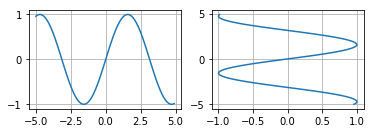

In [2]:
x = np.arange(-5, 5, 0.1)
y = np.sin(x)

fig = plt.figure()
ax1 = fig.add_subplot(221)
ax1.plot(x, y)
ax1.grid()
ax2 = fig.add_subplot(222)
ax2.plot(y, x)
ax2.grid()
plt.show()

## 1.2 Why are graphs that don't pass the vertical line test not considered "functions?"

A function $f(x)$ maps $x \rightarrow y$ space. It is a one to one mapping.  Graphs that don't pass the vertical line tests have one to multiple mapping, thus not a function.


# Functions as Relations

## 2.1 Which of the following relations are functions? Why?

\begin{align}
\text{Relation 1: } \{(1, 2), (3, 2), (1, 3)\}
\\
\text{Relation 2: } \{(1, 3), (2, 3), (6, 7)\}
\\
\text{Relation 3: } \{(9, 4), (2, 1), (9, 6)\}
\\
\text{Relation 4: } \{(6, 2), (8, 3), (6, 4)\}
\\
\text{Relation 5: } \{(2, 6), (2, 7), (2, 4)\}
\end{align}

Relation 2 is a function.  The rest have x mapping to multiple y values, thus not a function.

# Functions as a mapping between dimensions


## 3.1 for the following functions what is the dimensionality of the domain (input) and codomain (range/output)?

\begin{align}
m(𝑥_1,𝑥_2,𝑥_3)=(x_1+x_2, x_1+x_3, x_2+x_3)
\\
n(𝑥_1,𝑥_2,𝑥_3,𝑥_4)=(x_2^2 + x_3, x_2x_4)
\end{align}

$m: \mathbb{R}^3 \rightarrow \mathbb{R}^3$

$n: \mathbb{R}^4 \rightarrow \mathbb{R}^2$

## 3.2 Do you think it's possible to create a function that maps from a lower dimensional space to a higher dimensional space? If so, provide an example.

Yes.

$f(x) = (x, 2x, 3x)$ that maps $f: \mathbb{R} \rightarrow \mathbb{R}^3$

# Vector Transformations

## 4.1 Plug the corresponding unit vectors into each function. Use the output vectors to create a transformation matrix.

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix}
\\
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix}
\end{align}

\begin{align}
\begin{bmatrix}x_1 \\ x_2 \end{bmatrix} = x_1 \begin{bmatrix} 1 \\ 0\end{bmatrix}  + x_2\begin{bmatrix} 0 \\ 1  \end{bmatrix}
\\
\\
T_p = \begin{bmatrix} 1 & 3 \\ -1 & 2\end{bmatrix}
\end{align}

\begin{align}
\\
\\
\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix} = x_1\begin{bmatrix} 1 \\ 0 \\ 0\end{bmatrix} + x_2\begin{bmatrix} 0 \\ 1 \\ 0\end{bmatrix} + x_3\begin{bmatrix} 0 \\ 0 \\ 1\end{bmatrix}
\\
\\
T_q = \begin{bmatrix} 4 & 1 & 2 \\ -1 & 2 & 3 \\ 5 & 1 & -2\end{bmatrix}
\end{align}

## 4.2 Verify that your transformation matrices are correct by choosing an input matrix and calculating the result both via the traditional functions above and also via vector-matrix multiplication.

\begin{align}
p(\begin{bmatrix}1 \\ 1 \end{bmatrix}) = \begin{bmatrix} 1 + 3*1 \\2*1 - 1  \end{bmatrix} = \begin{bmatrix} 4 \\ 1\end{bmatrix}
\\
\\
\begin{bmatrix} 1\\1\end{bmatrix} \begin{bmatrix}1&3\\-1&2\end{bmatrix} = \begin{bmatrix} 1+3 \\ -1+2 \end{bmatrix} = \begin{bmatrix} 4 \\ 1 \end{bmatrix}
\end{align}

\begin{align}
q(\begin{bmatrix}1 \\ 1 \\1\end{bmatrix}) = \begin{bmatrix} 4*1 + 1 +2*1 \\2*1 - 1 + 3*1\\5*1 -2*1+1  \end{bmatrix} = \begin{bmatrix} 7 \\ 4 \\4\end{bmatrix}
\\
\\
\begin{bmatrix} 1\\1\\1\end{bmatrix} \begin{bmatrix}4&1&2\\-1&2&3\\5&1&-2\end{bmatrix} = \begin{bmatrix} 4+1+2 \\ -1+2 +3 \\ 5+1-2\end{bmatrix} = \begin{bmatrix} 7 \\ 4 \\4\end{bmatrix}
\end{align}

# Eigenvalues and Eigenvectors

## 5.1 In your own words, give an explanation for the intuition behind eigenvalues and eigenvectors.

Eigenvector is a vector after linear transformation becomes itself, scaled by the eigenvalue.

# The Curse of Dimensionality

## 6.1 What are some of the challenges of working with high dimensional spaces?

Increased search space for finding relationships between data.  Higher dimensions takes exponentially higher compute time.


## 6.2 What is the rule of thumb for how many observations you should have compared to parameters in your model?

5x as many observations vs number of features.

# Principal Component Analysis

## 7.1 Load the UCI Machine Learning Repository's [Iris Dataset](https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv) and use PCA to isolate the dataset's first and second principal components and plot them on a graph. 

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


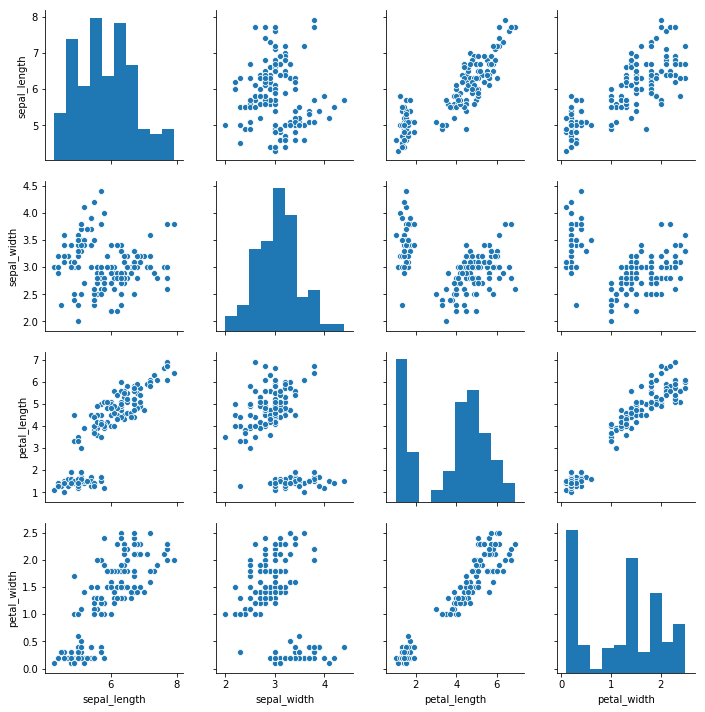

In [3]:
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns

url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv'
iris = pd.read_csv(url)
print(iris.head())
sns.pairplot(iris)

In [4]:
pca = PCA(n_components=2)
iris_t = pca.fit_transform(iris.iloc[:, :3])
print(iris_t[:5,])

[[-2.49120628  0.32842889]
 [-2.52490896 -0.17066072]
 [-2.71231754 -0.1299729 ]
 [-2.55917263 -0.30820093]
 [-2.53908694  0.33875833]]


In [7]:
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

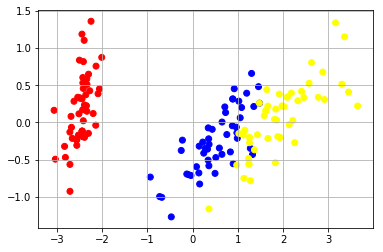

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
colors = {'setosa':'red', 'versicolor':'blue', 'virginica':'yellow'}
ax.scatter(iris_t[:,0], iris_t[:,1], c = iris.species.apply(lambda x: colors[x]))
ax.grid()
plt.show()

# Stretch Goal

## 1) Do NOT work on the stretch goal until you feel like you have a firm grasp of eigenvectors, eigenvalues, and PCA. Prioritize self-study over the stretch goal if you are not comfortable with those topics yet.

## 2) Explore further the intuition behind eigenvalues and eigenvectors by creating your very own eigenfaces:

<center>![Eigenfaces](https://i.pinimg.com/236x/1c/f1/01/1cf101a9859437a5d096a04b05be06b4--faces-tattoo.jpg)</center>

You don't necessarily have to use this resource, but this will get you started: 
[Eigenface Tutorial](https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/)